Universidad Nacional Abierta y a Distancia UNAD
Análisis de datos
Grupo: 202016908_71

Regresión logística.
Pasos de la actividad:

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
•Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

In [3]:
#1 - Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#Crear librerías
import pandas as pd #Manejo y análisis de estructuras de datos
import numpy as np #Cálculo numérico y el análisis de datos
import seaborn as sns #Creación gráficos estadísticos
import matplotlib.pyplot as plt #Creación de gráficos en dos dimenciones

#Librerías para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
Datos = pd.read_csv('./heart_cleveland_upload.csv', encoding='latin1')

In [8]:
#Realizamos la lectura de los datos para el análisis exploratorio
Datos.head(60)

,age(edad),sex(sexo),cp(tipo_de_dolor),trestbps(presión_arterial_en_reposo),chol(colesterol),fbs(glucema_en_ayunas),restecg(resultados_electrocardiográficos_en_reposo),thalach(ritmo_cardiaco_máximo_alcanzado),exang(angina_inducida_por_el_ejercicio),oldpeak(st_depression_inducido_por_el_ejercicio_relativo_al_reposo),slope(pendiente_del_segmento_st),ca(núm._de_venas_que_se_pueden_ver_en_una_fluoroscopia),thal(anemia_llamada_talasemia),condition(condición)
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
#Descripción de los datos
Datos.describe()

,age(edad),sex(sexo),cp(tipo_de_dolor),trestbps(presión_arterial_en_reposo),chol(colesterol),fbs(glucema_en_ayunas),restecg(resultados_electrocardiográficos_en_reposo),thalach(ritmo_cardiaco_máximo_alcanzado),exang(angina_inducida_por_el_ejercicio),oldpeak(st_depression_inducido_por_el_ejercicio_relativo_al_reposo),slope(pendiente_del_segmento_st),ca(núm._de_venas_que_se_pueden_ver_en_una_fluoroscopia),thal(anemia_llamada_talasemia),condition(condición)
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

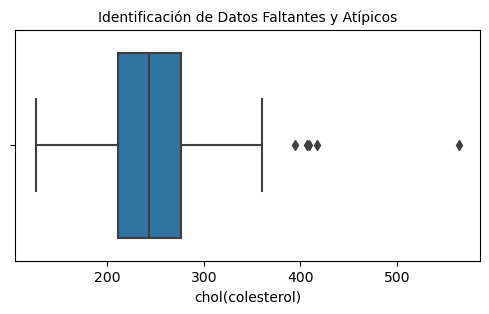

In [10]:
#Identificación de Datos faltantes y atípicos
plt.figure(figsize=(6, 3))  
sns.boxplot(x=Datos['chol(colesterol)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [11]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
#Revisión de datos faltantes

print("Cantidad de registros con cero en edad:",Datos['age(edad)'].isin([0]).sum())
print("Cantidad de registros con cero en sexo:",Datos['sex(sexo)'].isin([0]).sum())
print("Cantidad de registros con cero en tipo de dolor:",Datos['cp(tipo_de_dolor)'].isin([0]).sum())
print("Cantidad de registros con cero en presión arterial en reposo:",Datos['trestbps(presión_arterial_en_reposo)'].isin([0]).sum())
print("Cantidad de registros con cero en colesterol:",Datos['chol(colesterol)'].isin([0]).sum())
print("Cantidad de registros con cero en glucema en ayunas:",Datos['fbs(glucema_en_ayunas)'].isin([0]).sum())
print("Cantidad de registros con cero en resultados electrocardiográficos en reposo:",Datos['restecg(resultados_electrocardiográficos_en_reposo)'].isin([0]).sum())
print("Cantidad de registros con cero en ritmo cardiaco máximo alcanzado:",Datos['thalach(ritmo_cardiaco_máximo_alcanzado)'].isin([0]).sum())
print("Cantidad de registros con cero en angina inducida por el ejercicio:",Datos['exang(angina_inducida_por_el_ejercicio)'].isin([0]).sum())
print("Cantidad de registros con cero en depresión inducido por el ejercicio:",Datos['oldpeak(st_depression_inducido_por_el_ejercicio_relativo_al_reposo)'].isin([0]).sum())
print("Cantidad de registros con cero en pendiente del segmento:",Datos['slope(pendiente_del_segmento_st)'].isin([0]).sum())
print("Cantidad de registros con cero en núm venas en fluoroscopia:",Datos['ca(núm._de_venas_que_se_pueden_ver_en_una_fluoroscopia)'].isin([0]).sum())
print("Cantidad de registros con cero en anemia:",Datos['thal(anemia_llamada_talasemia)'].isin([0]).sum())

Cantidad de registros con cero en edad: 0
Cantidad de registros con cero en sexo: 96
Cantidad de registros con cero en tipo de dolor: 23
Cantidad de registros con cero en presión arterial en reposo: 0
Cantidad de registros con cero en colesterol: 0
Cantidad de registros con cero en glucema en ayunas: 254
Cantidad de registros con cero en resultados electrocardiográficos en reposo: 147
Cantidad de registros con cero en ritmo cardiaco máximo alcanzado: 0
Cantidad de registros con cero en angina inducida por el ejercicio: 200
Cantidad de registros con cero en depresión inducido por el ejercicio: 96
Cantidad de registros con cero en pendiente del segmento: 139
Cantidad de registros con cero en núm venas en fluoroscopia: 174
Cantidad de registros con cero en anemia: 164


In [12]:
#Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['sex(sexo)']=Datos['sex(sexo)'].replace(0,Datos['sex(sexo)'].mean())
Datos['cp(tipo_de_dolor)']=Datos['cp(tipo_de_dolor)'].replace(0,Datos['cp(tipo_de_dolor)'].mean())
Datos['fbs(glucema_en_ayunas)']=Datos['fbs(glucema_en_ayunas)'].replace(0,Datos['fbs(glucema_en_ayunas)'].mean())
Datos['restecg(resultados_electrocardiográficos_en_reposo)']=Datos['restecg(resultados_electrocardiográficos_en_reposo)'].replace(0,Datos['restecg(resultados_electrocardiográficos_en_reposo)'].mean())
Datos['exang(angina_inducida_por_el_ejercicio)']=Datos['exang(angina_inducida_por_el_ejercicio)'].replace(0,Datos['exang(angina_inducida_por_el_ejercicio)'].mean())
Datos['oldpeak(st_depression_inducido_por_el_ejercicio_relativo_al_reposo)']=Datos['oldpeak(st_depression_inducido_por_el_ejercicio_relativo_al_reposo)'].replace(0,Datos['oldpeak(st_depression_inducido_por_el_ejercicio_relativo_al_reposo)'].mean())
Datos['slope(pendiente_del_segmento_st)']=Datos['slope(pendiente_del_segmento_st)'].replace(0,Datos['slope(pendiente_del_segmento_st)'].mean())
Datos['ca(núm._de_venas_que_se_pueden_ver_en_una_fluoroscopia)']=Datos['ca(núm._de_venas_que_se_pueden_ver_en_una_fluoroscopia)'].replace(0,Datos['ca(núm._de_venas_que_se_pueden_ver_en_una_fluoroscopia)'].mean())
Datos['thal(anemia_llamada_talasemia)']=Datos['thal(anemia_llamada_talasemia)'].replace(0,Datos['thal(anemia_llamada_talasemia)'].mean())

In [13]:
#Nuevamente se hace revisión de datos faltantes

print("Cantidad de registros con cero en edad:",Datos['age(edad)'].isin([0]).sum())
print("Cantidad de registros con cero en sexo:",Datos['sex(sexo)'].isin([0]).sum())
print("Cantidad de registros con cero en tipo de dolor:",Datos['cp(tipo_de_dolor)'].isin([0]).sum())
print("Cantidad de registros con cero en presión arterial en reposo:",Datos['trestbps(presión_arterial_en_reposo)'].isin([0]).sum())
print("Cantidad de registros con cero en colesterol:",Datos['chol(colesterol)'].isin([0]).sum())
print("Cantidad de registros con cero en glucema en ayunas:",Datos['fbs(glucema_en_ayunas)'].isin([0]).sum())
print("Cantidad de registros con cero en resultados electrocardiográficos en reposo:",Datos['restecg(resultados_electrocardiográficos_en_reposo)'].isin([0]).sum())
print("Cantidad de registros con cero en ritmo cardiaco máximo alcanzado:",Datos['thalach(ritmo_cardiaco_máximo_alcanzado)'].isin([0]).sum())
print("Cantidad de registros con cero en angina inducida por el ejercicio:",Datos['exang(angina_inducida_por_el_ejercicio)'].isin([0]).sum())
print("Cantidad de registros con cero en depresión inducido por el ejercicio:",Datos['oldpeak(st_depression_inducido_por_el_ejercicio_relativo_al_reposo)'].isin([0]).sum())
print("Cantidad de registros con cero en pendiente del segmento:",Datos['slope(pendiente_del_segmento_st)'].isin([0]).sum())
print("Cantidad de registros con cero en núm venas en fluoroscopia:",Datos['ca(núm._de_venas_que_se_pueden_ver_en_una_fluoroscopia)'].isin([0]).sum())
print("Cantidad de registros con cero en anemia:",Datos['thal(anemia_llamada_talasemia)'].isin([0]).sum())

Cantidad de registros con cero en edad: 0
Cantidad de registros con cero en sexo: 0
Cantidad de registros con cero en tipo de dolor: 0
Cantidad de registros con cero en presión arterial en reposo: 0
Cantidad de registros con cero en colesterol: 0
Cantidad de registros con cero en glucema en ayunas: 0
Cantidad de registros con cero en resultados electrocardiográficos en reposo: 0
Cantidad de registros con cero en ritmo cardiaco máximo alcanzado: 0
Cantidad de registros con cero en angina inducida por el ejercicio: 0
Cantidad de registros con cero en depresión inducido por el ejercicio: 0
Cantidad de registros con cero en pendiente del segmento: 0
Cantidad de registros con cero en núm venas en fluoroscopia: 0
Cantidad de registros con cero en anemia: 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

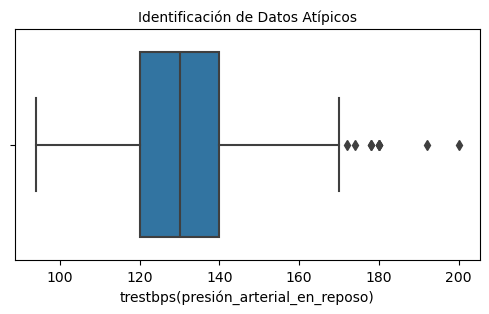

In [14]:
#Identificación de Datos atípicos

plt.figure(figsize=(6, 3))  
sns.boxplot(x=Datos['trestbps(presión_arterial_en_reposo)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [17]:
#Conteo de Datos atípicos

nivel_minimo=20
nivel_maximo=160
Total_Atipicos=((Datos['trestbps(presión_arterial_en_reposo)']<nivel_minimo)|(Datos['trestbps(presión_arterial_en_reposo)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 15


In [18]:
#Filtrar Datos Atípicos

Datos=Datos[(Datos['trestbps(presión_arterial_en_reposo)']<nivel_maximo)&(Datos['trestbps(presión_arterial_en_reposo)']>nivel_minimo)]

In [19]:
#Validar si se removieron los datos atípicos

nivel_minimo=20
nivel_maximo=160
Total_Atipicos=((Datos['trestbps(presión_arterial_en_reposo)']<nivel_minimo)|(Datos['trestbps(presión_arterial_en_reposo)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [20]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 1 to 296
Data columns (total 14 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   age(edad)                                                            271 non-null    int64  
 1   sex(sexo)                                                            271 non-null    float64
 2   cp(tipo_de_dolor)                                                    271 non-null    float64
 3   trestbps(presión_arterial_en_reposo)                                 271 non-null    int64  
 4   chol(colesterol)                                                     271 non-null    int64  
 5   fbs(glucema_en_ayunas)                                               271 non-null    float64
 6   restecg(resultados_electrocardiográficos_en_reposo)                  271 non-null    float64
 7   thalach(ritmo

In [21]:
#3. Seleccionar las caracterísicas más relevantes para entrenar el modelo utilizando selección de características
#Característica de interes:

#Presencia de enfermedad cardiaca: si la persona tiene enfermedad cardiaca o no (0= no tiene enfermedad cardiaca - 1= si tiene enfermedad cardiaca)
#Predecir si una persona puede tener una enfermedad cardiaca

#Total de personas con enfermedad cardiaca
Datos['condition(condición)'].value_counts()

condition(condición)
0    151
1    120
Name: count, dtype: int64

In [22]:
Datos[['condition(condición)']].head(20)

,condition(condición)
1,0
2,0
3,1
4,0
6,0
7,1
8,0
12,1
13,0
14,0


In [23]:
# 4. DIVIDIR EL DATASET EN TRAIN Y TEST PARA EVALUAR CORRECTAMENTE EL MODELO

#PORCENTAJE DE DATOS PARA ENTRENAMIENTO (TRAIN) = 75% Y PARA PRUEBA(TEST) 25%

Datos = Datos[['condition(condición)', 'chol(colesterol)', 'trestbps(presión_arterial_en_reposo)']]
X = Datos.drop('condition(condición)',axis=1)
Y = Datos['condition(condición)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [24]:
print (X_train)

     chol(colesterol)  trestbps(presión_arterial_en_reposo)
175               212                                   145
139               233                                   130
122               256                                   130
23                269                                   120
248               286                                   122
..                ...                                   ...
277               309                                   142
213               318                                   114
130               275                                   130
55                204                                   105
190               244                                   150

[203 rows x 2 columns]


In [25]:
print (Y_train)

175    1
139    0
122    0
23     0
248    1
      ..
277    1
213    1
130    0
55     0
190    1
Name: condition(condición), Length: 203, dtype: int64


In [26]:
# 5. ENTRENAR EL MODELO CONFIGURANDO LOS DIFERENTES HIPERPARAMETROS

modelo_regresion = LogisticRegression(solver='liblinear')
modelo_regresion.fit (X_train , Y_train)
Prediccion = modelo_regresion.predict(X_test)

In [27]:
# 5. 
print (Y_test)

72     0
149    0
249    0
142    0
280    1
      ..
171    1
83     0
52     1
223    0
137    0
Name: condition(condición), Length: 68, dtype: int64


In [28]:
# 5. 
print (Prediccion)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [29]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1 score, etc.

#Desempeño del modelo de regresión
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        35
           1       0.00      0.00      0.00        33

    accuracy                           0.51        68
   macro avg       0.26      0.50      0.34        68
weighted avg       0.26      0.51      0.35        68



C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Prediccion)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.49


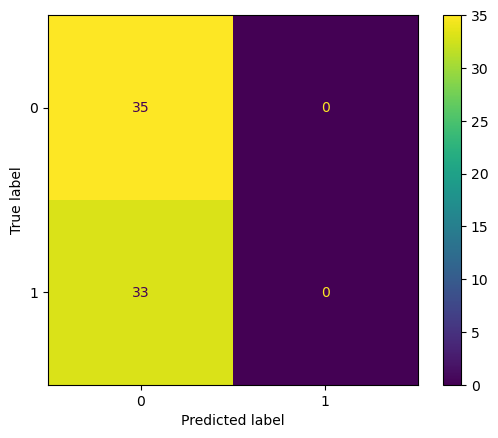

In [31]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

#Matrix de confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

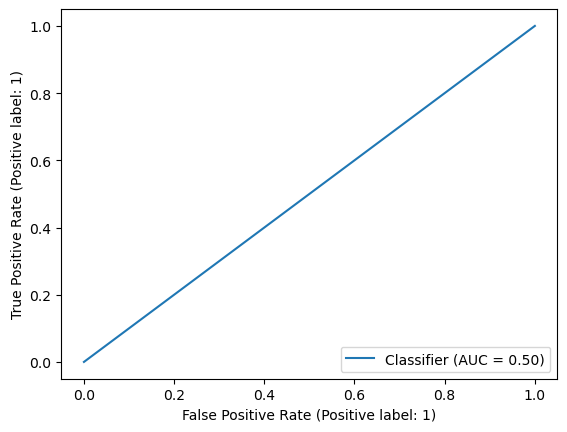

In [32]:
#Curva de precisión del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

#8. Interpretar, analizar y documentar los resultados obtenidos:


Del desempeño del modelo se puede describir:
* Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "condición" es: 0.51 lo que significa que el 51% de los predichos como oisitivo para enfermedad cardiaca por el modelo eran en realidad enfermos cardiacos.
* Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase condición es 0.50, lo que indica que el modelo identificó correctamente al 50% de todos los enfermos cardiacos.
*F1 score: Es la media armónica de precisión de recuperación. Proporciona una puntuación única que equilibra la precisión y recall. Aquí la puntuación F1 para la clase condición es 0.51, lo que indica un equilibrio entre precisión y recuento.

De la matriz de confusión podemos interpretar:
*Verdaderos negativos: El recuento de observaciones que un clasificador predijo correctamente como falso: 35
*Verdaderos positivos: El recuento de observaciones que un clasificador predijo correctamente como verdadero: 0
*Falsos positivos: El recuento de observaciones que un clasificador predijo incorrectamente como verdaderas: 0
*Falsos negativos: El recuento de observaciones que un clasificador predijo incorrectamente como falso: 33

De la curva de precisión del modelo se puede interpretar:
*el AUC es 0.50 lo que significa que el 50% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.